#Линейные модели, SVM и деревья решений.
Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

##Требования к отчету:
Отчет по лабораторной работе должен содержать:

1. титульный лист;
2. описание задания;
3. текст программы;
4. экранные формы с примерами выполнения программы.

##Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
 - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
 - SVM;
 - дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик.
6. Сравните качество полученных моделей. Постройте график, показывающий важность признаков в дереве решений.
8. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

### Шаг 1: Предобработка данных

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

df = pd.read_csv('nasa.csv')

# Проверяем наличие пропусков и, в случае необходимости, заполняем или удаляем пропущенные значения
df.isnull().sum()
df.fillna(0, inplace=True)

# Преобразование строк с датами в datetime
df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'])
df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date'])

# Перевод дат в количество дней с начала эпохи
df['Close Approach Date(days)'] = (df['Close Approach Date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')
df['Orbit Determination Date(days)'] = (df['Orbit Determination Date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')

df = df.drop(['Close Approach Date', 'Orbit Determination Date'], axis=1)
df = df.drop(['Equinox'], axis = 1)
# Кодирование категориальных признаков если они есть
# Пример кодирования для 'Orbiting Body' если в нем есть пропуски или не числовые значения
df = pd.get_dummies(df, columns=['Orbiting Body'])

ModuleNotFoundError: No module named 'pandas'

###Шаг 2: Разделяем на обучающую и тестирующую выборку

In [7]:
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


NameError: name 'df' is not defined

###Шаг 3: Обучим модели

In [23]:
# Логистическая регрессия
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

# SVM
svm_clf = SVC(probability=True)
svm_clf.fit(X_train_scaled, y_train)

# Дерево решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

###Шаг 4: Оценим качество моделей с помощью двух подходящий метрик


In [20]:
models = [log_reg, svm_clf, tree_clf]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    print(f'{name}: Accuracy = {accuracy_score(y_test, y_pred)}, ROC-AUC = {roc_auc_score(y_test, y_pred_proba)}')


Logistic Regression: Accuracy = 0.9538024164889837, ROC-AUC = 0.986186802557388
SVM: Accuracy = 0.9417199715707179, ROC-AUC = 0.9797500806064753
Decision Tree: Accuracy = 0.994314143567875, ROC-AUC = 0.9889352867624507


###Шаг 5: Сравним качество полученных моделей. Построим график, показывающий важность признаков в дереве решений.

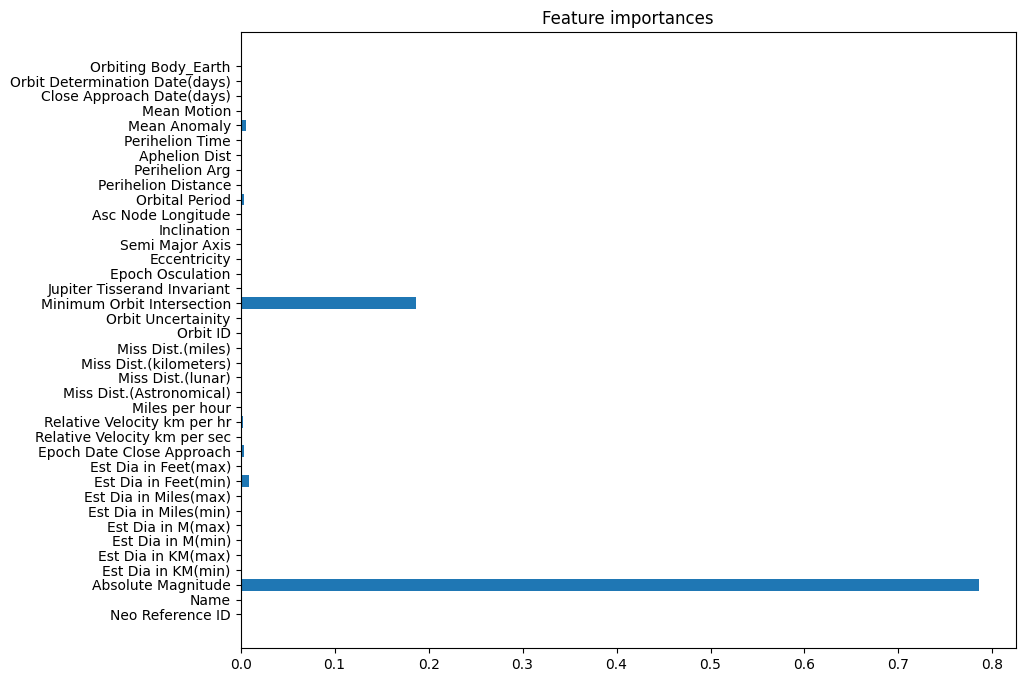

In [21]:
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), tree_clf.feature_importances_)
plt.yticks(range(X.shape[1]), X.columns, rotation=0)
plt.show()


### Шаг 6: Визуализация дерева решений

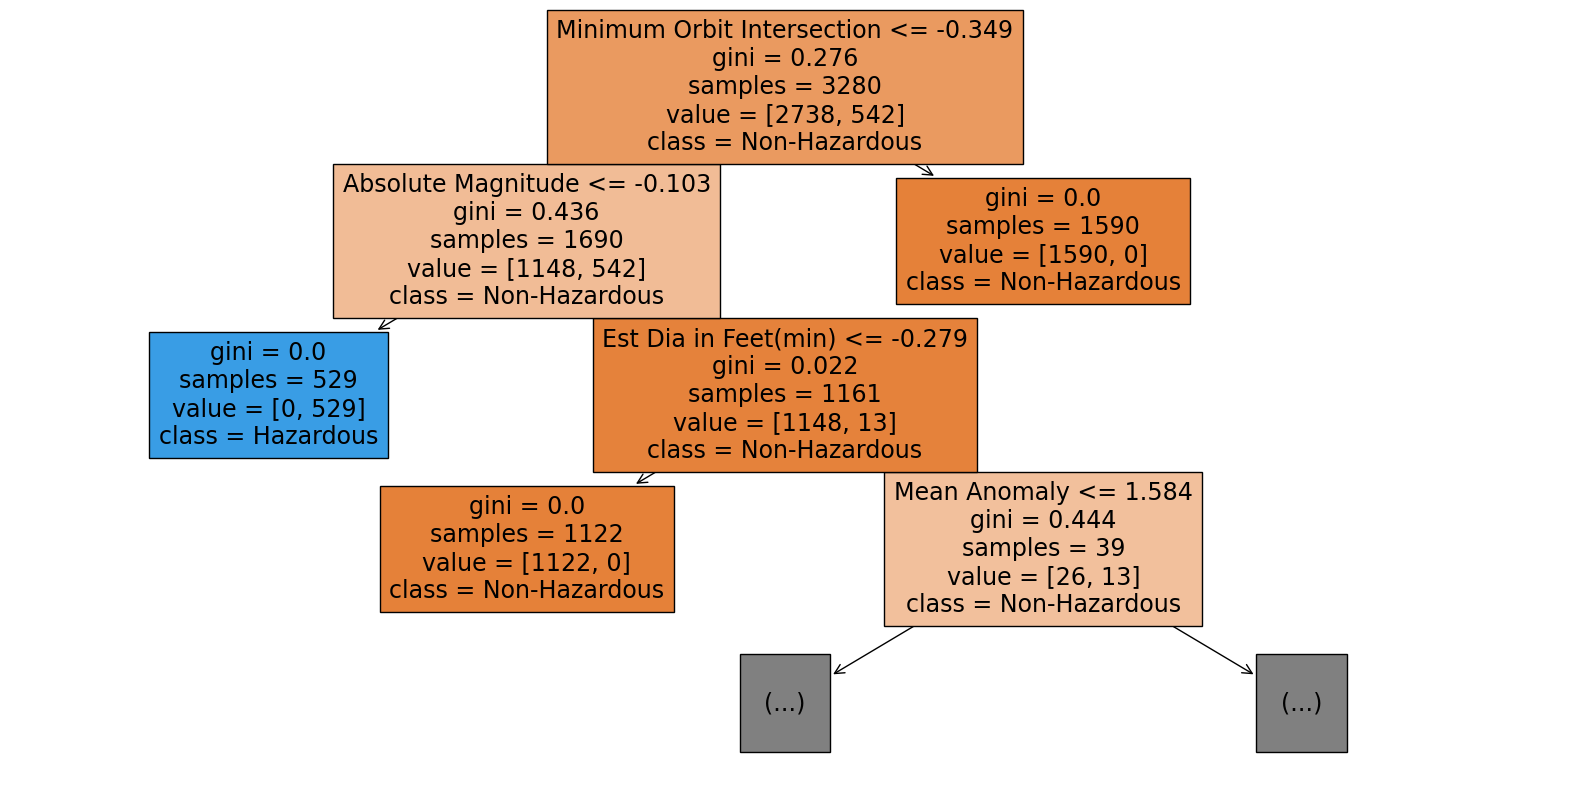

In [22]:
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['Non-Hazardous', 'Hazardous'], max_depth=3)
plt.show()
